## 加载 rqalpha magic

In [1]:
%load_ext rqalpha

## 使用 rqalpha magic 进行回测

我们可以通过 `%%rqalpha` 直接在 `cell` 中运行回测代码。 `%%rqalpha` 后面的参数等价于在 CLI 中后面的 `rqalpha run` 的参数

In [9]:
%%rqalpha -h
""

Usage: __main__.py [OPTIONS]

  Start to run a strategy

Options:
  -h, --help                      Show this message and exit.
  -d, --data-bundle-path PATH
  -f, --strategy-file PATH
  -s, --start-date DATE
  -e, --end-date DATE
  -sc, --stock-starting-cash FLOAT
  -fc, --future-starting-cash FLOAT
  -bm, --benchmark TEXT
  -mm, --margin-multiplier FLOAT
  -st, --security [stock|future|stock_future]
  -fq, --frequency [1d|1m|tick]
  -rt, --run-type [b|p]
  --resume
  --source-code TEXT
  -l, --log-level [verbose|debug|info|error|none]
  --locale [cn|en]
  --disable-user-system-log       disable user system log
  --extra-vars TEXT               override context vars
  --enable-profiler               add line profiler to profile your strategy
  --config TEXT                   config file path
  -mc, --mod-config TEXT...       mod extra config
  -i, --init-cash FLOAT           [Deprecated]
  -k, --kind [stock|future|stock_future]
                                  [Deprecated]
  --strate

## 使用 rqalpha magic 进行回测

/Users/cedricporter/git/ricequant/rqalpha/rqalpha/utils/risk.py:122: RuntimeWarning: invalid value encountered in double_scalars
  self._beta = cov[0][1] / cov[1][1]


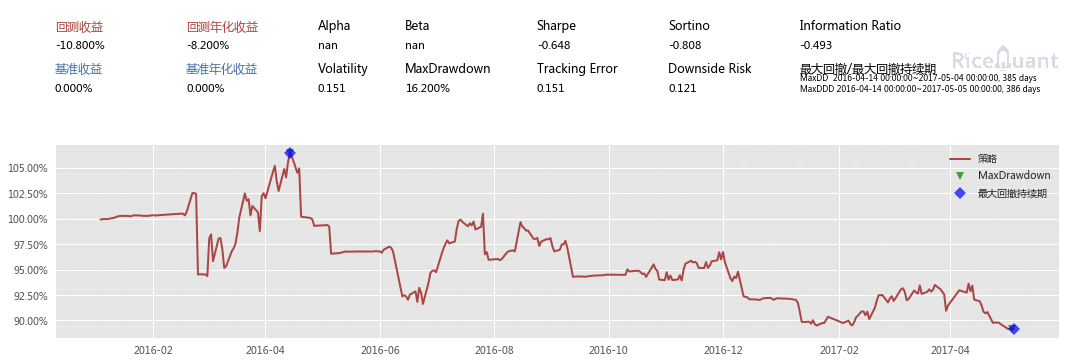

In [2]:
%%rqalpha -s 20160101 -e 20170505 -sc 100000 -st stock -p 

def init(context):
    context.stocks = ['000300.XSHG', '000905.XSHG', '000012.XSHG']

    
def handle_bar(context, bar_dict):
    [hs, zz, gz] = context.stocks
    hs_history20 = history_bars(hs, 20, '1d', 'close')
    zz_history20 = history_bars(zz, 20, '1d', 'close')
    
    hsIncrease = hs_history20[-1] - hs_history20[0]
    zzIncrease = zz_history20[-1] - zz_history20[0]
    
    positions = context.portfolio.positions
    [hsQuality, zzQuality, gzQuality] = [positions[hs].quantity, positions[zz].quantity, positions[gz].quantity]
    if hsIncrease < 0 and zzIncrease < 0:
        if hsQuality > 0: order_target_percent(hs, 0)
        if zzQuality > 0: order_target_percent(zz, 0)
        order_target_percent(gz, 1)
    elif hsIncrease < zzIncrease:
        if hsQuality > 0: order_target_percent(hs, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(zz, 1)
    else:
        if zzQuality > 0: order_target_percent(zz, 0)
        if gzQuality > 0: order_target_percent(gz, 0)
        order_target_percent(hs, 1)
        #logger.info("positions hs300: " + str(hsQuality) + ", zz500: " + str(zzQuality) + ", gz: " + str(gzQuality))

## 获取回测报告

运行完回测后，报告会自动存储到 `report` 变量中。可以直接通过 `report` 变量获取当次回测的结果

In [3]:
report.keys()

dict_keys(['trades', 'summary', 'stock_account', 'portfolio', 'stock_positions'])

In [4]:
report.trades[:5]

,commission,exec_id,last_price,last_quantity,order_book_id,order_id,position_effect,side,symbol,tax,trading_datetime,transaction_cost
datetime,,,,,,,,,,,,
2016-01-04 15:00:00,79.928288,1495253418,154.66,646,000012.XSHG,1495253416,None,BUY,国债指数,0,2016-01-04 15:00:00,79.928288
2016-02-18 15:00:00,80.372736,1495253419,155.52,646,000012.XSHG,1495253417,None,SELL,国债指数,0,2016-02-18 15:00:00,80.372736
2016-02-18 15:00:00,76.251264,1495253420,5957.13,16,000905.XSHG,1495253418,None,BUY,中证500(沪),0,2016-02-18 15:00:00,76.251264
2016-02-22 15:00:00,78.127616,1495253421,6103.72,16,000905.XSHG,1495253419,None,SELL,中证500(沪),0,2016-02-22 15:00:00,78.127616
2016-02-22 15:00:00,82.058680,1495253422,155.65,659,000012.XSHG,1495253420,None,BUY,国债指数,0,2016-02-22 15:00:00,82.058680


In [5]:
report.portfolio[:5]

,cash,market_value,static_unit_net_value,total_value,unit_net_value,units
date,,,,,,
2016-01-04,9.712,99910.36,1.000,99920.072,0.999201,100000.0
2016-01-05,9.712,99936.20,0.999,99945.912,0.999459,100000.0
2016-01-06,9.712,99955.58,0.999,99965.292,0.999653,100000.0
2016-01-07,9.712,99942.66,1.000,99952.372,0.999524,100000.0
2016-01-08,9.712,99962.04,1.000,99971.752,0.999718,100000.0


In [6]:
report.stock_positions[:5]

,avg_price,last_price,market_value,order_book_id,quantity,symbol
date,,,,,,
2016-01-04,154.66,154.66,99910.36,000012.XSHG,646,国债指数
2016-01-05,154.66,154.70,99936.20,000012.XSHG,646,国债指数
2016-01-06,154.66,154.73,99955.58,000012.XSHG,646,国债指数
2016-01-07,154.66,154.71,99942.66,000012.XSHG,646,国债指数
2016-01-08,154.66,154.74,99962.04,000012.XSHG,646,国债指数
